# RAINFALL ANORMALY INDEX (RAI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Accra=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Accra_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Precip'])
Kumasi=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Kumasi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Precip'])
Sunyani=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Sunyani_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Precip'])
Navrongo=pd.read_fwf('C:/Users/USER/Desktop/OneQuantum-Ghana-main/GAUGE_PRECIP/Navrongo_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','Precip'])

In [3]:
Accra

,Year,Month,Day,Precip
0,1983,1,1,0.0
1,1983,1,2,0.0
2,1983,1,3,0.0
3,1983,1,4,0.0
4,1983,1,5,0.0
...,...,...,...,...
12779,2017,12,27,0.0
12780,2017,12,28,0.0
12781,2017,12,29,0.0
12782,2017,12,30,0.0


In [4]:
# creating a new Datetime column named Date

Accra['Date']=pd.to_datetime(Accra[['Year','Month','Day']])
Accra=Accra[['Date','Precip']].set_index('Date')

Kumasi['Date']=pd.to_datetime(Kumasi[['Year','Month','Day']])
Kumasi=Kumasi[['Date','Precip']].set_index('Date')

Sunyani['Date']=pd.to_datetime(Sunyani[['Year','Month','Day']])
Sunyani=Sunyani[['Date','Precip']].set_index('Date')

Navrongo['Date']=pd.to_datetime(Navrongo[['Year','Month','Day']])
Navrongo=Navrongo[['Date','Precip']].set_index('Date')

In [5]:
#current yearly rainfall
#yearly average rainfall of historical data

Accra_sum=Accra.resample('y').sum()
Accra_mean=Accra_sum['Precip'].mean()
Accra_ano=pd.DataFrame(Accra_sum['Precip']-Accra_mean)

Kumasi_sum=Kumasi.resample('y').sum()
Kumasi_mean=Kumasi_sum['Precip'].mean()
Kumasi_ano=pd.DataFrame(Kumasi_sum['Precip']-Kumasi_mean)

Sunyani_sum=Sunyani.resample('y').sum()
Sunyani_mean=Sunyani_sum['Precip'].mean()
Sunyani_ano=pd.DataFrame(Sunyani_sum['Precip']-Sunyani_mean)

Navrongo_sum=Navrongo.resample('y').sum()
Navrongo_mean=Navrongo_sum['Precip'].mean()
Navrongo_ano=pd.DataFrame(Navrongo_sum['Precip']-Navrongo_mean)

In [6]:
#Average of 10 Highest and lowest yearly precipitation of historical data

Accra_sort=Accra_ano.sort_values(by='Precip', ascending=False)
Ac_high=Accra_sort.head(10).mean()
Ac_low=Accra_sort.tail(10).mean()

Kumasi_sort=Kumasi_ano.sort_values(by='Precip', ascending=False)
Kum_high=Kumasi_sort.head(10).mean()
Kum_low=Kumasi_sort.tail(10).mean()

Sunyani_sort=Sunyani_ano.sort_values(by='Precip', ascending=False)
Sun_high=Sunyani_sort.head(10).mean()
Sun_low=Sunyani_sort.tail(10).mean()

Navrongo_sort=Navrongo_ano.sort_values(by='Precip', ascending=False)
Nav_high=Navrongo_sort.head(10).mean()
Nav_low=Navrongo_sort.tail(10).mean()

Calulating Rainfall Anomally Index (RAI)
=

RAI_POS=3*((Ac.where(Ac>0))/(A_high-Accra_mean))
RAI_NEG=3*((Ac.where(Ac<0))/(A_low-Accra_mean))
RAI=Accra_ano.where(Accra_ano>=0, RAI_NEG).where(Accra_ano<0, RAI_POS)

In [7]:
#Calculating RAI for all four stations
RAI_POS_Ac=3*(Accra_ano[Accra_ano>=0])/(Ac_high-Accra_mean)
RAI_NEG_Ac=-3*(Accra_ano[Accra_ano<0])/(Ac_low-Accra_mean)

RAI_POS_Ku=3*(Kumasi_ano[Kumasi_ano>=0])/(Kum_high-Accra_mean)
RAI_NEG_Ku=-3*(Kumasi_ano[Kumasi_ano<0])/(Kum_low-Accra_mean)

RAI_POS_Sun=3*(Sunyani_ano[Sunyani_ano>=0])/(Sun_high-Accra_mean)
RAI_NEG_Sun=-3*(Sunyani_ano[Sunyani_ano<0])/(Sun_low-Accra_mean)

RAI_POS_Nav=3*(Navrongo_ano[Navrongo_ano>=0])/(Nav_high-Accra_mean)
RAI_NEG_Nav=-3*(Navrongo_ano[Navrongo_ano<0])/(Nav_low-Accra_mean)

#merging both postive and negative RAI values for all stations 
RAI_POS_Ac.update(RAI_NEG_Ac)
RAI_POS_Ku.update(RAI_NEG_Ku)
RAI_POS_Sun.update(RAI_NEG_Sun)
RAI_POS_Nav.update(RAI_NEG_Nav)

Timeseries Visualization of Anomalies
=

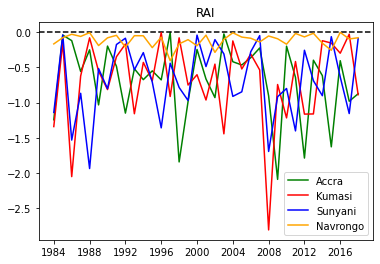

In [8]:
#Plotting all stations on one graph
#ax= RAI_POS.Precip.plot(figsize=(15,7))
plt.plot(RAI_POS_Ac,color='green', label ='Accra')#, marker='*')
plt.axhline(0, ls='--', color='black')
plt.plot(RAI_POS_Ku, color='red', label= 'Kumasi')#, marker='^')
plt.plot(RAI_POS_Sun, color='blue', label= 'Sunyani')#, marker='p')
plt.plot(RAI_POS_Nav, color='orange', label= 'Navrongo')#, marker='o')
#ax.axhline(0, ls='--', color='r')
plt.title('RAI')
plt.legend()

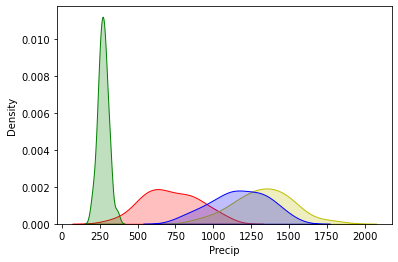

In [9]:
# Density plot

fig=sns.kdeplot(Accra_sum['Precip'], shade=True, color='r')
fig=sns.kdeplot(Kumasi_sum['Precip'], shade=True, color='y')
fig=sns.kdeplot(Sunyani_sum['Precip'], shade=True, color='b')
fig=sns.kdeplot(Navrongo_sum['Precip'], shade=True, color='g')
plt.show()
# sns.kdeplot(RAI_POS_Ac.index,[RAI_POS_Ac['Precip']=='Iris_Virginica'],color='green', shade=True, label='Accra')
# sns.kdeplot(RAI_POS_Ku.index,[RAI_POS_Ku['Precip']=='Iris_Setosa'],color='blue', shade=True, label='Kumasi')
# sns.kdeplot(RAI_POS_Sun.index,[RAI_POS_Sun['Precip']=='Iris_Vercicolor'],color='red', shade=True, label='Sunyani')
# sns.kdeplot(RAI_POS_Nav.index,[RAI_POS_Nav['Precip']=='orange'],color='violet', shade=True, label='Navrongo')


Creating an RAI Function
=

In [10]:
def RAI(data):
    Annual_Total=data.resample('y').sum()
    Annual_Avg=Annual_Total.Precip.mean()
    Anomally=Annual_Total-Annual_Avg
    Arrange_data= Anomally.sort_values(by='Precip',ascending=False)
    Data_high=Arrange_data.head(10).mean()
    Data_low=Arrange_data.tail(10).mean()
    
    Pos_RAI=3*Anomally[Anomally>=0]/(Data_high-Annual_Avg)
    Neg_RAI=-3*Anomally[Anomally<0]/(Data_low-Annual_Avg)
    
    RAI=Anomally.where(Anomally>=0, Neg_RAI).where(Anomally<0, Pos_RAI)
    #data1=data.assign(RAI= RA)
    
    return RAI

In [11]:
RAI(Accra)

,Precip
Date,
1983-12-31,-1.244915
1984-12-31,-0.040591
1985-12-31,-0.119303
1986-12-31,-0.557887
1987-12-31,-0.249842
1988-12-31,-1.033207
1989-12-31,-0.196719
1990-12-31,-0.484358
1991-12-31,-1.150104


# Calculating RAI with plot on netcdf file

In [12]:
import xarray as xr

In [13]:
ds=xr.open_dataset('C:/Users/USER/Desktop/OneQuantum-Ghana-main/data/Relative_humidity_1981_2020.nc')

In [14]:
ds.r

<xarray.DataArray 'r' (time: 8640, latitude: 65, longitude: 137)>
[76939200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -17.0 -16.75 -16.5 -16.25 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 20.0 19.75 19.5 19.25 ... 4.75 4.5 4.25 4.0
  * time       (time) datetime64[ns] 1991-01-01 ... 2020-12-01T23:00:00
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

In [15]:
# slicing location

Accra=ds.sel(longitude=-0.19, latitude=5.55, method='nearest')
Kumasi=ds.sel(longitude=-1.36, latitude=6.43, method='nearest')
Sunyani=ds.sel(longitude=-2.32, latitude=7.35, method='nearest')
Navrongo=ds.sel(longitude=-1.07, latitude=10.89, method='nearest')

C:\Users\USER\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\USER\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\USER\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\USER\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  in

In [ ]:
# performing anomaly calculations

In [16]:
Accra_pp=Accra.groupby('time.year').sum()
Kumasi_pp=Kumasi.groupby('time.year').sum()
Sunyani_pp=Sunyani.groupby('time.year').sum()
Navrongo_pp=Navrongo.groupby('time.year').sum()

In [17]:
Accra_avg=Accra_pp.r.mean()
Kumasi_avg=Kumasi_pp.r.mean()
Sunyani_avg=Sunyani_pp.r.mean()
Navrongo_avg=Navrongo_pp.r.mean()

In [18]:
Accra_ano=Accra_pp-Accra_avg
Kumasi_ano=Kumasi_pp-Kumasi_avg
Sunyani_ano=Sunyani_pp-Sunyani_avg
Navrongo_ano=Navrongo_pp-Navrongo_avg

In [ ]:
# sorting out data

In [19]:
Accra_sort=sorted(Accra_ano.r, reverse=True)
Kumasi_sort= sorted(Kumasi_ano.r,reverse=True)
Sunyani_sort= sorted(Sunyani_ano.r,reverse=True)
Navrongo_sort= sorted(Navrongo_ano.r,reverse=True)

In [20]:
Accra_high=np.mean(Accra_sort[0:10])
Kumasi_high=np.mean(Kumasi_sort[0:10])
Sunyani_high=np.mean(Sunyani_sort[0:10])
Navrongo_high=np.mean(Navrongo_sort[0:10])

In [21]:
Accra_low=np.mean(Accra_sort[20:])
Kumasi_low=np.mean(Kumasi_sort[20:])
Sunyani_low=np.mean(Sunyani_sort[20:])
Navrongo_low=np.mean(Navrongo_sort[20:])

In [22]:
# Performing RAI calculations on data

RAI_POS_Ac=3*(Accra_ano.r[Accra_ano.r>=0])/(Accra_high-Accra_avg)
RAI_NEG_Ac=-3*(Accra_ano.r[Accra_ano.r<0])/(Accra_low-Accra_avg)

RAI_POS_Ku=3*(Kumasi_ano.r[Kumasi_ano.r>=0])/(Kumasi_high-Kumasi_avg)
RAI_NEG_Ku=-3*(Kumasi_ano.r[Kumasi_ano.r<0])/(Kumasi_low-Kumasi_avg)

RAI_POS_Sun=3*(Sunyani_ano.r[Sunyani_ano.r>=0])/(Sunyani_high-Sunyani_avg)
RAI_NEG_Sun=-3*(Sunyani_ano.r[Sunyani_ano.r<0])/(Sunyani_low-Sunyani_avg)

RAI_POS_Nav=3*(Navrongo_ano.r[Navrongo_ano.r>=0])/(Navrongo_high-Navrongo_avg)
RAI_NEG_Nav=-3*(Navrongo_ano.r[Navrongo_ano.r<0])/(Navrongo_low-Navrongo_avg)

# RAI=Accra_ano.where(Accra_ano>=0, RAI_NEG_Ac).where(Accra_ano<0, RAI_POS_Ac)
# RAI=Kumasi_ano.where(Kumasi_ano>=0, RAI_NEG_Ku).where(Kumasi_ano<0, RAI_POS_Ku)
# RAI=Sunyani_ano.where(Sunyani_ano>=0, RAI_NEG_Sun).where(Sunyani_ano<0, RAI_POS_Sun)
# RAI=Navrongo_ano.where(Navrongo_ano>=0, RAI_NEG_Nav).where(Navrongo_ano<0, RAI_POS_Nav)


RAI_Ac=np.hstack((RAI_POS_Ac,RAI_NEG_Ac))
RAI_Ku=np.hstack((RAI_POS_Ku,RAI_NEG_Ku))
RAI_Sun=np.hstack((RAI_POS_Sun,RAI_NEG_Sun))
RAI_Nav=np.hstack((RAI_POS_Nav,RAI_NEG_Nav))


# RAI_POS_Ac.update(RAI_NEG_Ac)
# RAI_POS_Ku.update(RAI_NEG_Ku)
# RAI_POS_Sun.update(RAI_NEG_Sun)
# RAI_POS_Nav.update(RAI_NEG_Nav)

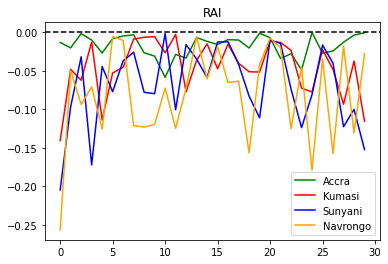

In [23]:
plt.plot(RAI_Ac,color='green', label ='Accra')#, marker='*')
plt.axhline(0, ls='--', color='black')
plt.plot(RAI_Ku, color='red', label= 'Kumasi')#, marker='^')
plt.plot(RAI_Sun, color='blue', label= 'Sunyani')#, marker='p')
plt.plot(RAI_Nav, color='orange', label= 'Navrongo')#, marker='o')

plt.title('RAI')
plt.legend()

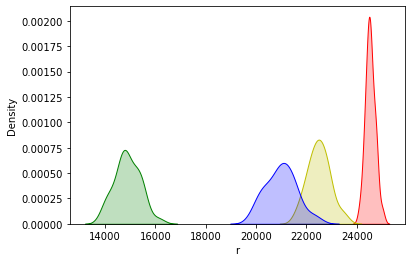

In [24]:
fig=sns.kdeplot(Accra_pp.r, shade=True, color='r')
fig=sns.kdeplot(Kumasi_pp.r, shade=True, color='y')
fig=sns.kdeplot(Sunyani_pp.r, shade=True, color='b')
fig=sns.kdeplot(Navrongo_pp.r, shade=True, color='g')
plt.show()

In [25]:
def RAI(data):
    Annual_Total=data.groupby('time.year').sum()
    Annual_Avg=Annual_Total.r.mean()
    Anomally=Annual_Total-Annual_Avg
    Arrange_data=sorted(Anomally.all('r'), reverse=True)
    Data_high=np.mean(Arrange_data[0:10])
    Data_low=np.mean(Arrange_data[20:])
    
    Pos_RAI=3*Anomally[Anomally>=0]/(Data_high-Annual_Avg)
    Neg_RAI=-3*Anomally[Anomally<0]/(Data_low-Annual_Avg)
    
    RAI=Anomally.where(Anomally>=0, Neg_RAI).where(Anomally<0, Pos_RAI)
    #data1=data.assign(RAI= RA)
    
    return RAI

In [26]:
RAI(ds)

ValueError: Dataset does not contain the dimensions: ['r']